In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df = pd.read_excel("Folds5x2_pp.xlsx")

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [4]:
np.mean(df)

AT      19.651231
V       54.305804
AP    1013.259078
RH      73.308978
PE     454.365009
dtype: float64

In [5]:
df.median()

AT      20.345
V       52.080
AP    1012.940
RH      74.975
PE     451.550
dtype: float64

In [6]:
df.std()

AT     7.452473
V     12.707893
AP     5.938784
RH    14.600269
PE    17.066995
dtype: float64

In [7]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


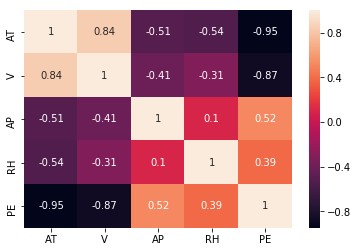

In [8]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
ambient_temperature = df['AT']
exhaust_vacuum = df['V']
ambient_pressure = df['AP']
relative_humidity = df['RH']
plant_energy_output = df['PE']

In [10]:
fig,ccpp = plt.subplots(2,3)

In [11]:
ccpp[0,0].boxplot(ambient_temperature)
ccpp[0,1].boxplot(exhaust_vacuum)
ccpp[0,2].boxplot(ambient_pressure)
ccpp[1,0].boxplot(relative_humidity)
ccpp[1,1].boxplot(plant_energy_output)


{'boxes': [<matplotlib.lines.Line2D at 0x7f17330399b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1733041400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f173304a0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1733041c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1733039b00>,
  <matplotlib.lines.Line2D at 0x7f1733039f98>]}

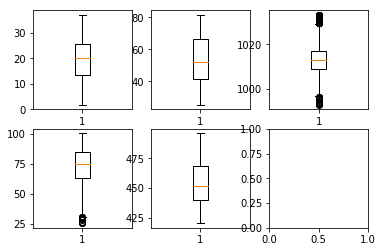

In [12]:
plt.figure(figsize=(20,8))
plt.show()


In [13]:
#ambient_temperature

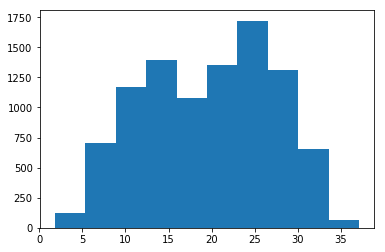

In [14]:
plt.hist(ambient_temperature,bins=10)
plt.show()

In [15]:
#ambient_pressure

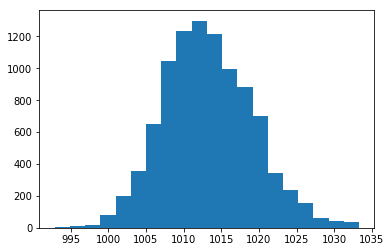

In [16]:
plt.hist(ambient_pressure,bins=20)
plt.show()

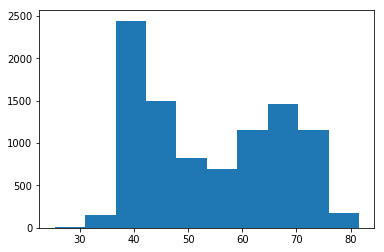

In [17]:
plt.hist(exhaust_vacuum,bins=10)
plt.show()

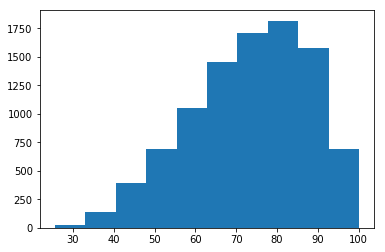

In [18]:
plt.hist(relative_humidity,bins=10)
plt.show()

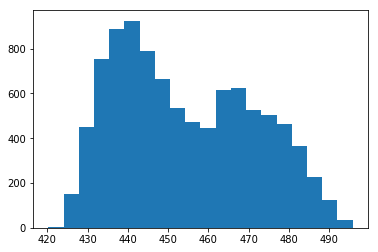

In [19]:
plt.hist(plant_energy_output,bins=20)
plt.show()

In [20]:
#80% data as Train dataset and 20% as Test dataset

In [21]:
xtrain = df.iloc[:7655,:4]
ytrain = df.iloc[:7655,4:]
#xtrain

In [22]:
xtest = df.iloc[7655:,:4]
ytest = df.iloc[7655:,4:]
#ytest

In [23]:
lin_model = LinearRegression()

In [24]:
lin_model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lin_model.predict(xtest)

array([[441.82904193],
       [445.14394502],
       [426.15474298],
       ...,
       [432.47274932],
       [443.10509547],
       [449.74518291]])

In [26]:
lin_model.score(xtest,ytest)

0.9246449943523912

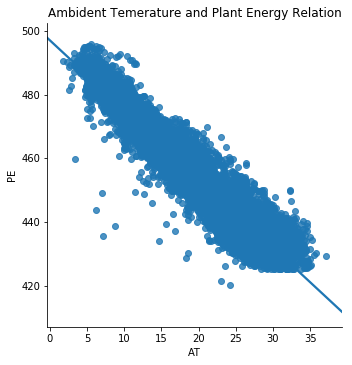

In [27]:
sns.lmplot(x="AT", y="PE", data=df)
plt.title('Ambident Temerature and Plant Energy Relation')
plt.show()

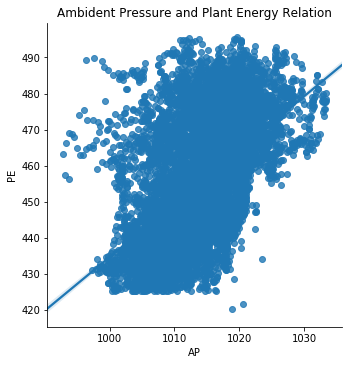

In [28]:
sns.lmplot(x="AP", y="PE", data=df)
plt.title('Ambident Pressure and Plant Energy Relation')
plt.show()

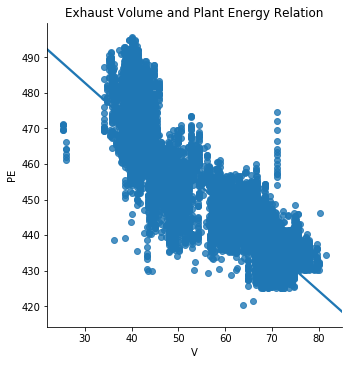

In [29]:
sns.lmplot(x="V", y="PE", data=df)
plt.title('Exhaust Volume and Plant Energy Relation')
plt.show()

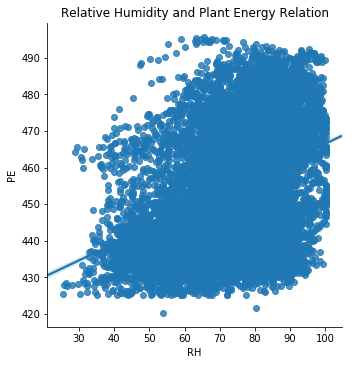

In [30]:
sns.lmplot(x="RH", y="PE", data=df)
plt.title('Relative Humidity and Plant Energy Relation')
plt.show()

In [31]:
quad_feature = PolynomialFeatures(degree=2)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9338502280297939

In [32]:
quad_feature = PolynomialFeatures(degree=3)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9367778711840852

In [33]:
quad_feature = PolynomialFeatures(degree=4)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9380846117329315

In [34]:
quad_feature = PolynomialFeatures(degree=5)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.936743890334244

In [35]:
quad_feature = PolynomialFeatures(degree=6)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9388071352817638

In [36]:
quad_feature = PolynomialFeatures(degree=7)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9364924482642509

In [37]:
quad_feature = PolynomialFeatures(degree=8)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9391750864551984

In [38]:
quad_feature = PolynomialFeatures(degree=9)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9380537936399923

In [39]:
quad_feature = PolynomialFeatures(degree=10)
xtrain_quad = quad_feature.fit_transform(xtrain)
xtest_quad = quad_feature.transform(xtest)
quad_model = LinearRegression()
quad_model.fit(xtrain_quad,ytrain)
quad_model.predict(xtest_quad)
quad_model.score(xtest_quad,ytest)

0.9383741698139699

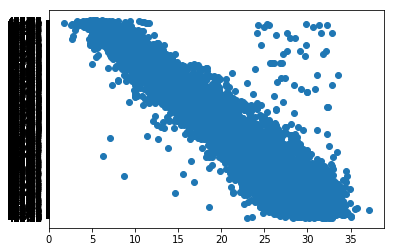

In [40]:
plt.scatter(xtrain['AT'],ytrain)
plt.show()